# WeatherPy
----

### Analysis
The analysis is based on the weather information obtained on March 24th,2019. The "city Latitude vs. Temprature" plot indicates that the temprature vary with latitude. The cities near the equator have higher tempratures compared to those away from the equator. From the plot, it is noticable that the temprature falls considerably for cities away from the equator.

The "city Latitude vs. Wind Speed" plot indicates that there is no clear relationship between wind speed and latitude. The "City Latitude vs. Humidity" plot plateaus at 100% with exception to one data point. In addition, there is no relationship between cloudiness and latitude as indicated in "Latitude vs. Cloudiness" plot. More analysis of weather data is required to infer any correlations between latitude and windspeed or cloudiness.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
import random
import openweathermapy.core as owm
import datetime


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Fetch current date using the datetime module

In [2]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print ("Fetch current date using str method of datetime object:")
print (date)


Fetch current date using str method of datetime object:
2019-03-25


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)


lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
print(city_count)


623


### Perform API Calls


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial" # miles/hour


header = '   Beginning Data Retrieval  '
trailer = '  Data Retrieval Complete   '
filler = '-----------------------------'

# Working Storage 
city = []
country_code = []
dt = []
humidity = []
cloudiness = []
city_temp = []
max_temp = []
wind_speed = []
lat = []
lng = []

city_count = 0

print(header)
print(filler)

for i in range(len(cities)):
        query_url = f"{url}appid={api_key}&units={units}&q={cities[i]}"
        #print(query_url)
        response = requests.get(query_url).json()

        if response["cod"] == 200:
            json.dumps(response,indent=4,sort_keys=True)
            city.append(response["name"])
            country_code.append(response["sys"]["country"])
            dt.append(response["dt"]) 
            humidity.append(response["main"]["humidity"])
            cloudiness.append(response["clouds"]["all"])
            city_temp.append(response["main"]["temp"])
            max_temp.append(response["main"]["temp_max"])
            wind_speed.append(response["wind"]["speed"])
            lat.append(response["coord"]["lat"])
            lng.append(response["coord"]["lon"])
            print(f"Retrieving  data for record {i+1} | {cities[i]}")
            
            city_count +=1
            if (city_count % 50 == 0):
                print("sleeping")
                time.sleep(61)
                                
            if city_count == 501:
                break
        elif response["cod"] == 429:
            print(response["message"])
            break
        else:
            print(f"City not found. Skipping...{cities[i]}")
            
print(filler)
print(trailer)
print(filler)

print(f"city         :{len(city)}")
print(f"country_code :{len(country_code)}")
print(f"Date         :{len(dt)}")
print(f"Humidity     :{len(humidity)}")
print(f"cloudiness   :{len(cloudiness)}")
print(f"city_temp    :{len(city_temp)}")
print(f"max_temp     :{len(max_temp)}")
print(f"wind_speed   :{len(wind_speed)}")
print(f"lat          :{len(lat)}")
print(f"lng          :{len(lng)}")


   Beginning Data Retrieval  
-----------------------------
Retrieving  data for record 1 | georgetown
Retrieving  data for record 2 | rikitea
Retrieving  data for record 3 | changde
Retrieving  data for record 4 | avarua
Retrieving  data for record 5 | ginda
Retrieving  data for record 6 | salinas
City not found. Skipping...nizhneyansk
Retrieving  data for record 8 | bluff
Retrieving  data for record 9 | atuona
Retrieving  data for record 10 | cape town
Retrieving  data for record 11 | tarauaca
Retrieving  data for record 12 | corrente
Retrieving  data for record 13 | gebre guracha
City not found. Skipping...paucartambo
City not found. Skipping...taolanaro
Retrieving  data for record 16 | tromso
Retrieving  data for record 17 | barrow
Retrieving  data for record 18 | bethel
Retrieving  data for record 19 | nikolskoye
Retrieving  data for record 20 | elizabethtown
Retrieving  data for record 21 | abashiri
Retrieving  data for record 22 | nanortalik
Retrieving  data for record 23 | ribe

Retrieving  data for record 193 | kavieng
City not found. Skipping...one hundred mile house
Retrieving  data for record 195 | rabaul
Retrieving  data for record 196 | katherine
Retrieving  data for record 197 | itarema
Retrieving  data for record 198 | taonan
City not found. Skipping...sembe
Retrieving  data for record 200 | tateyama
Retrieving  data for record 201 | cidreira
Retrieving  data for record 202 | vereshchagino
Retrieving  data for record 203 | pakala
Retrieving  data for record 204 | dikson
Retrieving  data for record 205 | avera
Retrieving  data for record 206 | bilibino
Retrieving  data for record 207 | saint-augustin
Retrieving  data for record 208 | yorkton
Retrieving  data for record 209 | mar del plata
Retrieving  data for record 210 | kushima
Retrieving  data for record 211 | san quintin
City not found. Skipping...doctor pedro p. pena
Retrieving  data for record 213 | arequipa
Retrieving  data for record 214 | gweta
Retrieving  data for record 215 | clyde river
Retr

Retrieving  data for record 387 | dicabisagan
Retrieving  data for record 388 | zhigansk
Retrieving  data for record 389 | tautira
Retrieving  data for record 390 | riyadh
Retrieving  data for record 391 | hovd
Retrieving  data for record 392 | khasan
Retrieving  data for record 393 | edd
sleeping
Retrieving  data for record 394 | qaqortoq
City not found. Skipping...camana
Retrieving  data for record 396 | karratha
Retrieving  data for record 397 | mayo
Retrieving  data for record 398 | yorosso
Retrieving  data for record 399 | chokurdakh
Retrieving  data for record 400 | lompoc
Retrieving  data for record 401 | khash
Retrieving  data for record 402 | wanxian
Retrieving  data for record 403 | saint stephen
City not found. Skipping...asau
Retrieving  data for record 405 | codrington
City not found. Skipping...uwayl
Retrieving  data for record 407 | san patricio
Retrieving  data for record 408 | waitati
Retrieving  data for record 409 | klaksvik
Retrieving  data for record 410 | dhaka
Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
DataDict = {'city': city
            ,'Cloudiness': cloudiness
            ,'Country':country_code
            ,'Date':dt
            ,'humidity': humidity
            ,'Lat':lat
            ,'Lng':lng
            ,'Max_Temp':max_temp
            ,'Wind_Speed':wind_speed
           }

weather_df = pd.DataFrame(DataDict)
weather_df.head()



,city,Cloudiness,Country,Date,humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Georgetown,20,GY,1553518800,74,6.80,-58.16,84.20,11.41
1,Rikitea,44,PF,1553523371,100,-23.12,-134.97,78.77,10.45
2,Changde,0,CN,1553523371,87,29.04,111.68,50.42,4.41
3,Avarua,80,CK,1553520600,94,-21.21,-159.78,78.80,2.24
4,Ginda,75,IN,1553520600,68,30.69,78.49,66.20,3.36


### Plotting the Data


#### Latitude vs. Temperature Plot

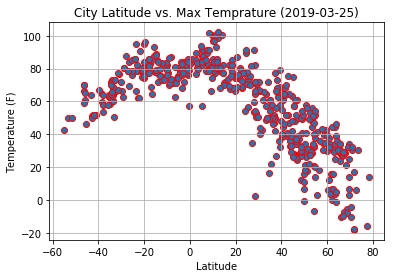

In [6]:

Lat = weather_df['Lat']
Max_Temp = weather_df['Max_Temp']
plt.scatter(Lat, Max_Temp, edgecolors='r')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()

title_LT = f"City Latitude vs. Max Temprature ({date})"
plt.title(title_LT)
plt.savefig("Latitude_vs_Temperature.png")
plt.show()


#### Latitude vs. Humidity Plot

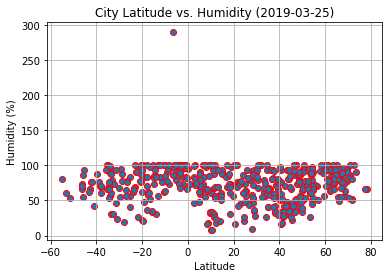

In [7]:
Lat = weather_df['Lat']
humidity = weather_df['humidity']
plt.scatter(Lat, humidity, edgecolors='r')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


plt_title_LH = f"City Latitude vs. Humidity ({date})"
plt.title(plt_title_LH)
plt.grid()
plt.savefig("Latitude_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

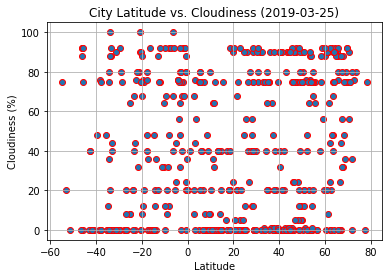

In [8]:
Lat = weather_df['Lat']
Cloudiness = weather_df['Cloudiness']
plt.scatter(Lat, Cloudiness, edgecolors='r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt_title_LC = f"City Latitude vs. Cloudiness ({date})"
plt.title(plt_title_LC)
plt.grid()
plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

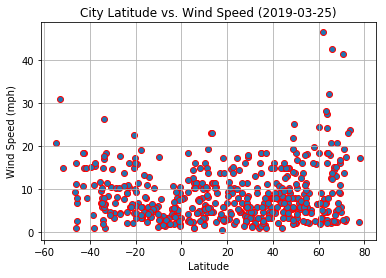

In [9]:
Lat = weather_df['Lat']
Wind_Speed = weather_df['Wind_Speed']
plt.scatter(Lat, Wind_Speed, edgecolors='r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')


plt_title_LW = f"City Latitude vs. Wind Speed ({date})"
plt.title(plt_title_LW)
plt.grid()
plt.savefig("Latitude_vs_WindSpeed.png")
plt.show()